In [2]:
# Dependencies 
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sqlalchemy import create_engine

In [3]:
# Set Connection String 
connection_string = "postgres:postgres@localhost:5432/emp_db"
engine = create_engine(f'postgresql://{connection_string}')
conn = engine.connect()

In [4]:
# Find the employee titles 
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [5]:
# Find the salary of each employee 
salaries = pd.read_sql("SELECT * FROM Salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [6]:
#Merge both salary and titles data frames together
merge_data = pd.merge(salaries, titles, on="emp_no", how = "inner" )
merge_data.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [7]:
#Drop other columns and keep emp_no and title
merge_data_new = merge_data.drop(columns=["from_date_x", "to_date_x", "from_date_y", "to_date_y", "emp_no"])
merge_data_new.head()

,salary,title
0,60117,Senior Engineer
1,65828,Staff
2,40006,Senior Engineer
3,40054,Engineer
4,40054,Senior Engineer


In [51]:
#Group data with title and calculate mean
grouped_df = merge_data_new.groupby("title").mean()
grouped_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


In [52]:
#Set index
new_grouped_df = grouped_df.reset_index()
new_grouped_df 

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


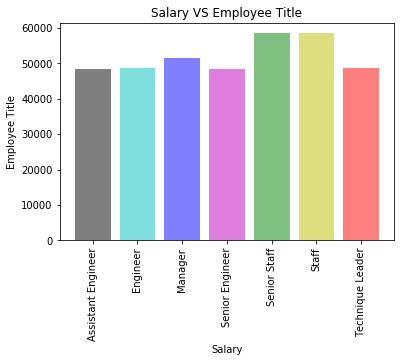

In [59]:
#Set the x and y axis
x_axis = new_grouped_df["title"]
y_axis = new_grouped_df["salary"]
x_ticks = np.arange(len(x_axis))

#set x and y label 
plt.xlabel("Salary")
plt.ylabel("Employee Title")
plt.title("Salary VS Employee Title")

#Organize bar graphs 
plt.bar(x_axis, y_axis, alpha=0.5, color=["k","c","b","m","g","y","r"])
plt.xticks(x_ticks, x_axis, rotation="vertical")
plt.show()

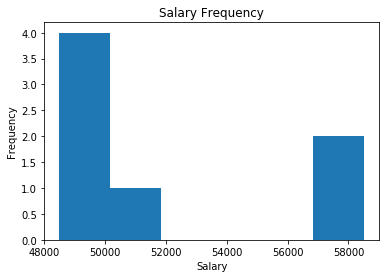

In [60]:
#Set x_axis
x_axis = new_grouped_df["salary"]
plt.hist(x_axis, bins = 6)

#set x and y label 
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.title("Salary Frequency")
plt.show()